# Confusion Matrix Problems 

In [1]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [3]:
sys.path.append("..")

from WatChMaL.analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from WatChMaL.analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output
from WatChMaL.analysis.plot_utils import plot_confusion_matrix, plot_classifier_response, compute_roc, plot_roc

In [4]:
############# define plotting params #############

c = plt.rcParams['axes.prop_cycle'].by_key()['color']

l = ['solid','dashdot','dashed','dotted',':','-.']

label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2, "$\pi^0$":3}

inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$", 3:"$\pi^0$"}

In [5]:
locs_2_class = ['/data/WatChMaL/data/WatChMaL_short_tank_results/2_classes/balanced/OD_veto_w_testing/2_Class_OD_veto/outputs',
                '/data/WatChMaL/data/WatChMaL_short_tank_results/2_classes/full_indices/OD_veto_w_testing/2_Class_OD_veto_full/outputs']

titles_2_class = ['2 Class','2 Class Extra Indices']

linecolor_2_class = [c[0] for _ in locs_2_class]
linestyle_2_class = ['-' for _ in locs_2_class]

raw_output_softmax_2_class = [np.load(loc + "/softmax.npy") for loc in locs_2_class]
raw_actual_labels_2_class  = [np.load(loc + "/labels.npy") for loc in locs_2_class]
raw_actual_indices_2_class = [np.load(loc + "/indices.npy") for loc in locs_2_class]
raw_actual_predictions_2_class = [np.load(loc + "/predictions.npy") for loc in locs_2_class]

In [6]:
two_class_names = np.array(["$\gamma$","$e$"])

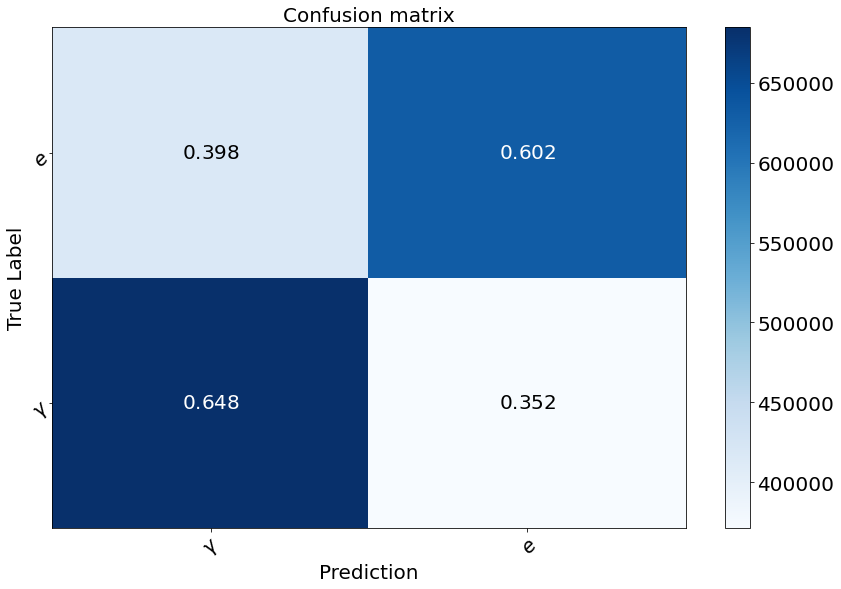

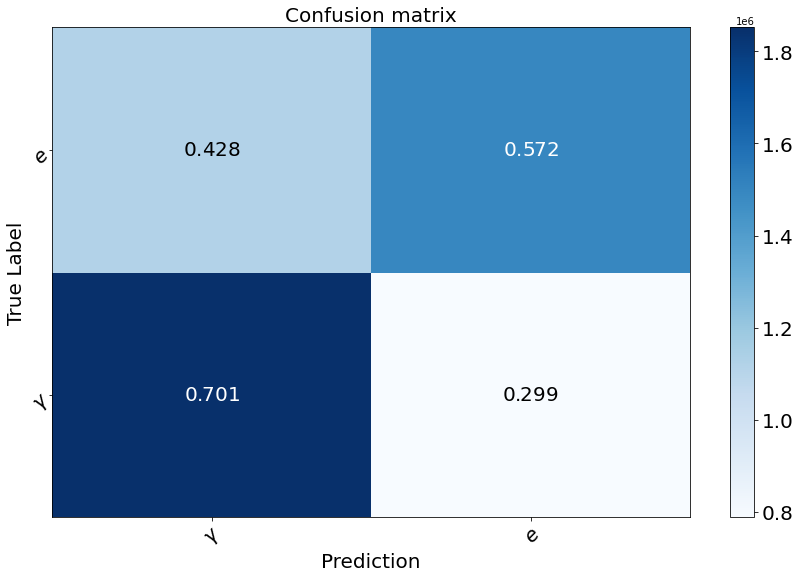

In [7]:
for i in range(len(locs_2_class)):
    plot_confusion_matrix(raw_actual_labels_2_class[i], raw_actual_predictions_2_class[i], two_class_names, normalize=True)

In [8]:
locs_3_class = [ '/home/hlahiouel/WatChMaL/outputs/2021-02-11/08-36-41/outputs']

titles_3_class = ['3 Class Run 1']

linecolor_3_class = [c[1] for _ in locs_3_class]
linestyle_3_class = ['--' for _ in locs_3_class]

raw_output_softmax_3_class = [np.load(loc + "/softmax.npy") for loc in locs_3_class]
raw_actual_labels_3_class  = [np.load(loc + "/labels.npy") for loc in locs_3_class]
raw_actual_indices_3_class = [np.load(loc + "/indices.npy") for loc in locs_3_class]
raw_actual_predictions_3_class = [np.load(loc + "/predictions.npy") for loc in locs_3_class]

In [9]:
print(raw_actual_predictions_3_class[0].shape)

(2756096,)


In [10]:
three_class_names = np.array(["$\gamma$","$e$","$\mu$"])

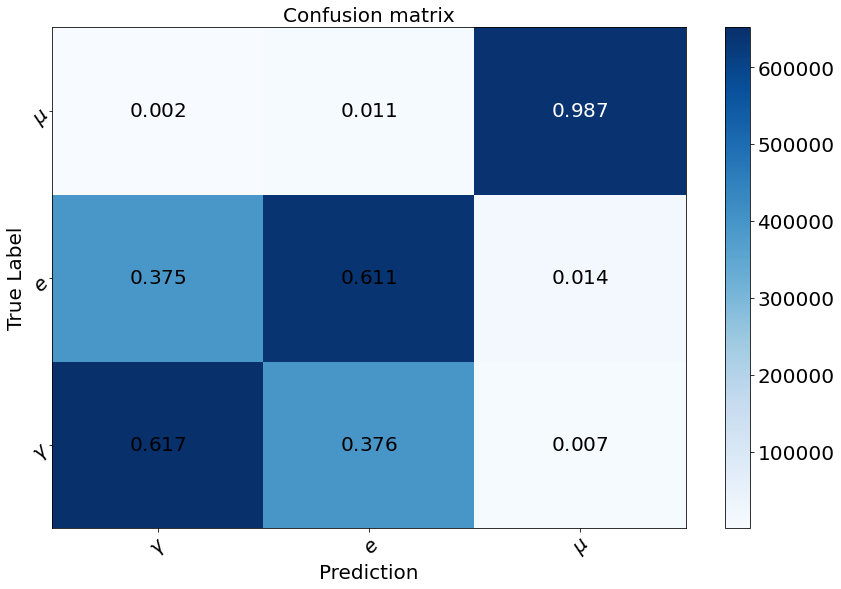

In [11]:
for i in range(len(locs_3_class)):
    plot_confusion_matrix(raw_actual_labels_3_class[i], raw_actual_predictions_3_class[i], three_class_names, normalize=True)

In [12]:
locs_4_class = ['/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run1/outputs',
                '/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run2/outputs',
                '/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run3/outputs',
                '/data/WatChMaL/data/WatChMaL_short_tank_results/4_classes/OD_veto_w_testing/4_Class_OD_Veto_run4/outputs']

titles_4_class = ['4 Class Run 1','4 Class Run 2','4 Class Run 3','4 Class Run 4']

linecolor_4_class = [c[2] for _ in locs_4_class]
linestyle_4_class = [':' for _ in locs_4_class]

raw_output_softmax_4_class = [np.load(loc + "/softmax.npy") for loc in locs_4_class]
raw_actual_labels_4_class  = [np.load(loc + "/labels.npy") for loc in locs_4_class]
raw_actual_indices_4_class = [np.load(loc + "/indices.npy") for loc in locs_4_class]
raw_actual_predictions_4_class = [np.load(loc + "/predictions.npy") for loc in locs_4_class]

In [13]:
four_class_names = np.array(["$\gamma$","$e$","$\mu$","$\pi^0$"])

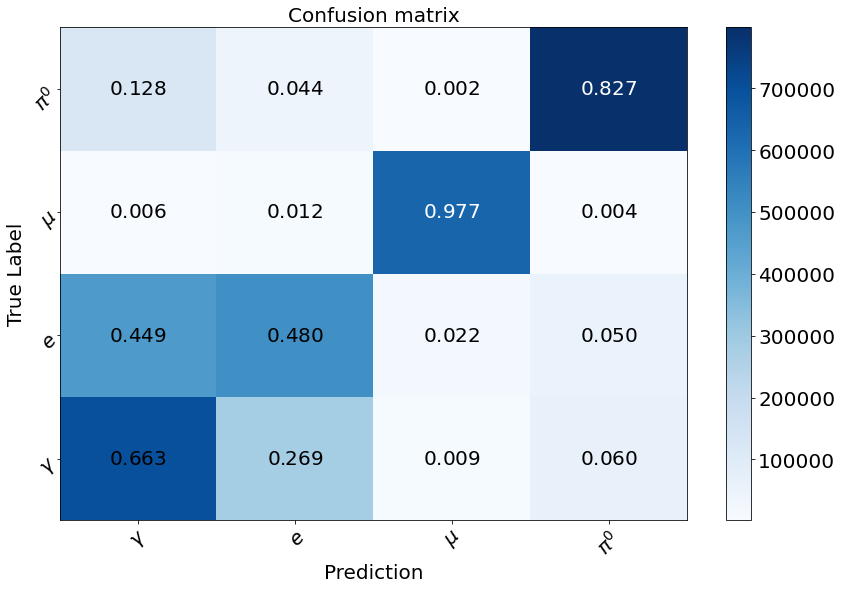

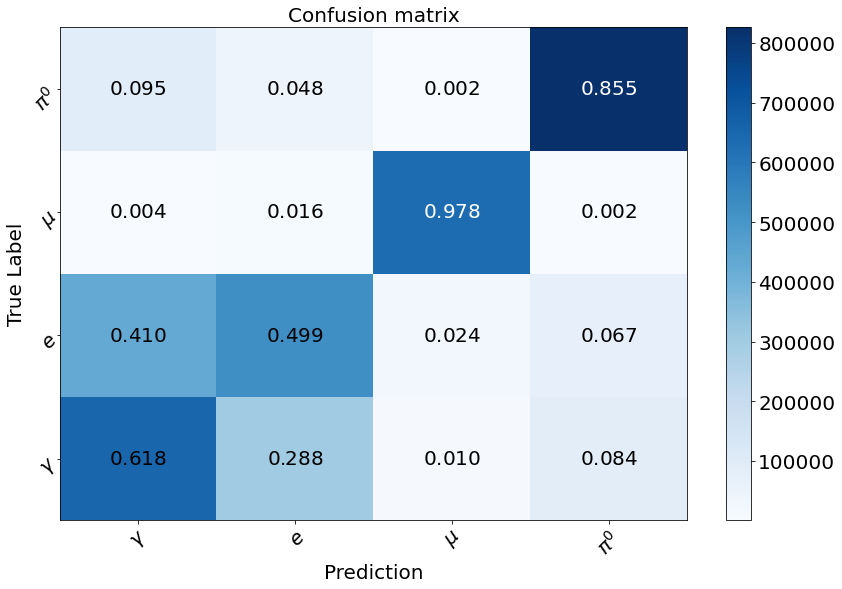

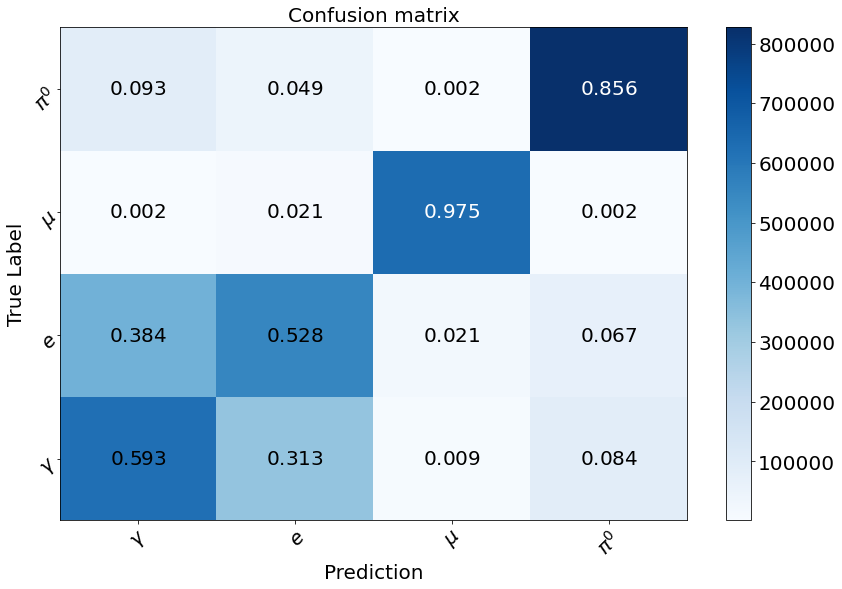

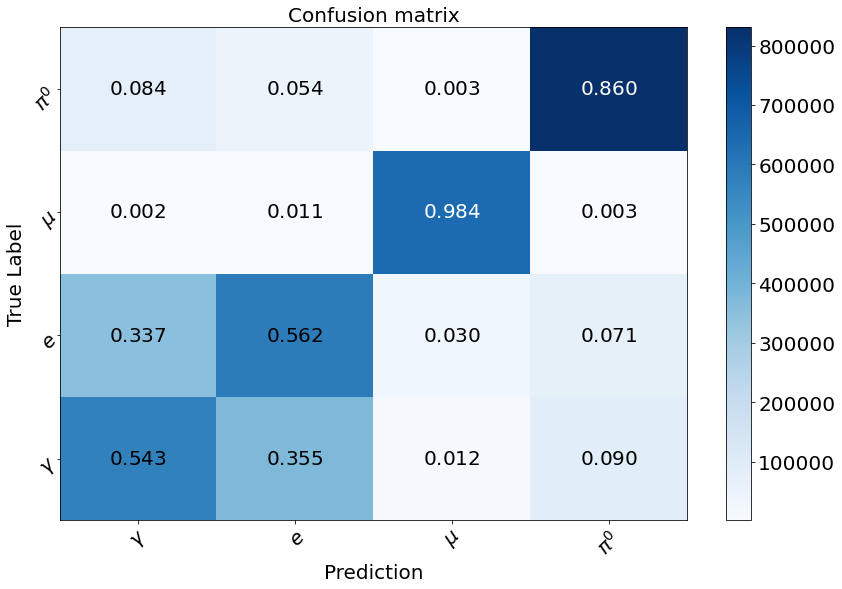

In [14]:
for i in range(len(locs_4_class)):
    plot_confusion_matrix(raw_actual_labels_4_class[i], raw_actual_predictions_4_class[i], four_class_names, normalize=True)

In [15]:
titles = titles_2_class + titles_3_class + titles_4_class

linecolor = linecolor_2_class + linecolor_3_class + linecolor_4_class
linestyle = linestyle_2_class + linestyle_3_class + linestyle_4_class

softmaxes = raw_output_softmax_2_class + raw_output_softmax_3_class + raw_output_softmax_4_class
labels    = raw_actual_labels_2_class + raw_actual_labels_3_class + raw_actual_labels_4_class
predictions = raw_actual_predictions_2_class + raw_actual_predictions_3_class + raw_actual_predictions_4_class

    """
    Plot the confusion matrix for a given energy interval
    
    Args: 
        labels        ... 1D array of true label value, the length = sample size
        predictions   ... 1D array of predictions, the length = sample size
        class_names   ... 1D array of string label for classification targets, the length = number of categories
    """